In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
import math

In [ ]:
data = pd.read_excel('D02_Boston.xlsx')
data.head()

In [3]:
x = data.iloc[:,1:-1]
y = data.iloc[:,-1]

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 200, random_state = 0)

regressor = LinearRegression()
regressor = regressor.fit(X_train, Y_train)#training the model

In [5]:
#predictions
Y_pred_train = regressor.predict(X_train)
Y_pred_test = regressor.predict(X_test)

In [6]:
#metrics
mse_train = mean_squared_error(Y_train, Y_pred_train)
rmse_train = math.sqrt(mse_train)
r2_train = r2_score(Y_train, Y_pred_train)

mse_test = mean_squared_error(Y_test, Y_pred_test)
rmse_test = math.sqrt(mse_test)
r2_test = r2_score(Y_test, Y_pred_test)

In [7]:
print('Metrics in train datased:')
print('rmse %.4f'%rmse_train, 'r2 %.4f'%r2_train,'\n')
print('Metrics in test datased:')
print('rmse %.4f'%rmse_test, 'r2 %.4f'%r2_test,'\n')

Metrics in train datased:
rmse 4.4738 r2 0.7672 

Metrics in test datased:
rmse 5.0739 r2 0.6851 



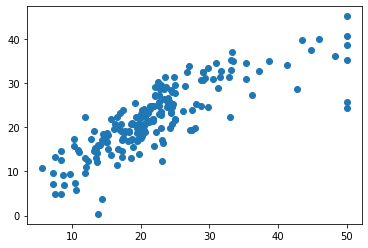

In [8]:
plt.scatter(x = Y_test, y = Y_pred_test)

In [9]:
#adjusting the scale of attributes
transformer = StandardScaler()
transformer.fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [18]:
#using polynomial regressor 

print(' POLYNOMIAL REGRESSOR \n ')
print(' K     RMSE TRAIN     R2 TRAIN    RMSE TEST    R2 TEST')
print('---    ----------     --------    ---------    -------')

for k in range(1,6):
    polyFeat = PolynomialFeatures(degree = k)
    
    polyFeat = polyFeat.fit(X_train)
    X_train_poly = polyFeat.transform(X_train)
    X_test_poly = polyFeat.transform(X_test)
    
    regressor = LinearRegression()
    regressor = regressor.fit(X_train_poly, Y_train)#training the model
    
    Y_pred_train = regressor.predict(X_train_poly)
    Y_pred_test = regressor.predict(X_test_poly)
    
    #train
    mse_train = mean_squared_error(Y_train, Y_pred_train)
    rmse_train = math.sqrt(mse_train)
    r2_train = r2_score(Y_train, Y_pred_train)
    
    #test
    mse_test = mean_squared_error(Y_test, Y_pred_test)
    rmse_test = math.sqrt(mse_test)
    r2_test = r2_score(Y_test, Y_pred_test)
    
    print('%3d %12.4f %12.4f %12.4f %12.4f' %(k, rmse_train, r2_train, rmse_test, r2_test))

 POLYNOMIAL REGRESSOR 
 
 K     RMSE TRAIN     R2 TRAIN    RMSE TEST    R2 TEST
---    ----------     --------    ---------    -------
  1       4.4738       0.7672       5.0739       0.6851
  2       2.0887       0.9493       4.5581       0.7459
  3       0.0000       1.0000     110.4396    -148.1828
  4       0.0000       1.0000     110.1103    -147.2945
  5       0.0000       1.0000     503.8598   -3104.1917
